# Introduction

In this project, unsupervised learning techniques are applied to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that is used has been provided by Bertelsmann Arvato Analytics, and represents a real-life data science task.

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project:

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. This information will be used to cluster the general population into groups with similar demographic properties. Then, it will be seen how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, the demographics data for the general population will be loaded into a pandas DataFrame, and the same for the feature attributes summary. All of the `.csv` data files in this project are semicolon (`;`) delimited.

In [2]:
# Load in the general demographics data
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter= ';')

# Load in the feature summary file
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter= ';')

In [3]:
azdias.head()

AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  ...  PLZ8_ANTG1  PLZ8_ANTG2  \
0                      5                 3  ...         NaN         NaN   
1                      4                 5  ...         2.0         3.0   
2                      3                 5  ...         3.0         3.0   
3                      1                 2  ...         2.0         2.0   
4                      3                 2  ...         2.0         4.0   

   PLZ8_ANTG3  PLZ8_ANTG4  PLZ8_BAUMAX  PLZ8_HHZ  PLZ8_GBZ  ARBEIT  \
0         NaN         NaN          NaN       NaN       NaN     NaN   
1         2.0         1.0          1.0       5.0       4.0     3.0   
2         1.0         0.0          1.0       4.0       4.0     3.0   
3         2.0         0.0          1.0       3.0       4.0     2.0   
4         2.0         1.0          2.0       3.0       3.0     4.0   

   ORTSGR_KLS9  RELAT_AB  
0          NaN       NaN  
1          5.0       4.0  
2          5.0       2.0  
3          3.0       3.0  
4          6.0       5.0  

[5 rows x 85 columns]

In [4]:
print("The general population dataframe has got {} rows and {} columns".format(azdias.shape[0],azdias.shape[1]))

The general population dataframe has got 891221 rows and 85 columns


In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
feat_info.head(15)

attribute information_level         type missing_or_unknown
0                AGER_TYP            person  categorical             [-1,0]
1    ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2               ANREDE_KZ            person  categorical             [-1,0]
3           CJT_GESAMTTYP            person  categorical                [0]
4       FINANZ_MINIMALIST            person      ordinal               [-1]
5           FINANZ_SPARER            person      ordinal               [-1]
6        FINANZ_VORSORGER            person      ordinal               [-1]
7          FINANZ_ANLEGER            person      ordinal               [-1]
8   FINANZ_UNAUFFAELLIGER            person      ordinal               [-1]
9        FINANZ_HAUSBAUER            person      ordinal               [-1]
10              FINANZTYP            person  categorical               [-1]
11            GEBURTSJAHR            person      numeric                [0]
12        GFK_URLAUBERTYP            person  categorical                 []
13       GREEN_AVANTGARDE            person  categorical                 []
14             HEALTH_TYP            person      ordinal             [-1,0]

In [7]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.8+ KB


In [8]:
print("The features summary dataframe has got {} rows and {} columns".format(feat_info.shape[0],feat_info.shape[1]))

The features summary dataframe has got 85 rows and 4 columns


## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The `feat_info` dataframe contains 85 rows representing the 85 columns in both the azdias and customers dataset. It provides valuable information on each column such as the level of information that the column provides (Personal, household etc.), the type of the column (categorical, ordinal, interval) and the values in the columns that represent missing or unknown entries.

This information will be very useful in cleaning and transforming the data in a format that is suitable for clustering.

#### Step 1.1.1: Convert Missing Value Codes to NaNs

The fourth column of the feature attributes summary documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. The string objects have to be parsed to make use of it to identify and clean the data. The data that matches a 'missing' or 'unknown' value code will be converted into a numpy NaN value.

In [9]:
#Prints missing_or_unknown value in the first row
mou_first = feat_info['missing_or_unknown'][0]

print(mou_first)

#Prints type of the first value
print(type(mou_first))

[-1,0]
<class 'str'>


The list is formatted as string. It can't be formatted into a list using list() as it will split every single character into its own value.

In [10]:
print(list(mou_first))

['[', '-', '1', ',', '0', ']']


The brackets from the string will have to be removed first, then the values will be split at every comma.

In [11]:
mou_to_list = mou_first.strip('][').split(',')

print(mou_to_list)
print(type(mou_to_list))

['-1', '0']
<class 'list'>


The values have been seperated as necessary. This method can be used by iterating over the parsed lists and replacing the values in the azdias dataset with NaNs

From exploring the `azdias.info()` printed earlier, it can be seen that all of the columns are either float or integer types with only four columns `[OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015 , CAMEO_INTL_2015]` being objects(strings). Let's see how they are represented in `feat_info`.

In [12]:
for attribute in ['OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015' , 'CAMEO_INTL_2015']:
    print(attribute)
    print("missing or unknown values are presented as {}".format(feat_info['missing_or_unknown'][feat_info['attribute'] == attribute].values[0]))

OST_WEST_KZ
missing or unknown values are presented as [-1]
CAMEO_DEUG_2015
missing or unknown values are presented as [-1,X]
CAMEO_DEU_2015
missing or unknown values are presented as [XX]
CAMEO_INTL_2015
missing or unknown values are presented as [-1,XX]


Not all missing values are represented as numbers, some are presented as `X` and `XX`. When replacing values with NaNs, the type of the column will have to be taken into consideration. For instance, if we try to replace the string `'-1'` with the value `-1` that exists in a numerical value, the replacement will fail as the type of the values are different. Thus, the numerical values that represent missing or unknown values will have to be changed to integers before replacing them in numerical columns.

In [13]:
replaced_azdias = azdias.copy()

# Iterate through all rows in feat_info
for index, row in feat_info.iterrows():
    string_to_list = row['missing_or_unknown'].strip('][').split(',')
    str_list = list(filter(None, string_to_list)) # removes empty strings
    column_name = row['attribute']

    if replaced_azdias[column_name].dtype != object: # If the columns are numerical
        
        int_list = list(map(int,str_list)) # Change value to an integer
        
        replaced_azdias[column_name].replace(int_list,np.NaN, inplace = True)
        
    else:
        replaced_azdias[column_name].replace(str_list,np.NaN, inplace = True)

#### Step 1.1.2: Assess Missing Data in Each Column

A comparison will be done on the dataset before and after replacing the missing or unknown values with NaNs to ensure that replacement was successful.

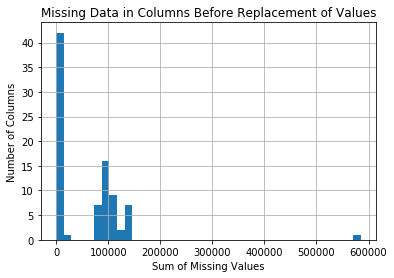

In [14]:
# Histogram of missing data before replacement of values
azdias.isnull().sum().hist(bins= 40)

plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Columns')
plt.title('Missing Data in Columns Before Replacement of Values')
plt.show()

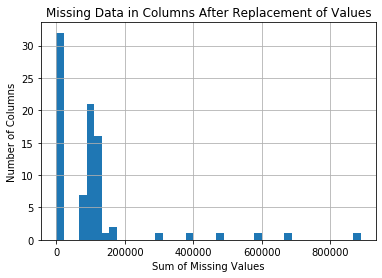

In [15]:
# Histogram of missing data after replacement of values
missing_value_cols = replaced_azdias.isnull().sum()

missing_value_cols.hist(bins= 40)

plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Columns')
plt.title('Missing Data in Columns After Replacement of Values')
plt.show()

Comparison of both histograms show that replacement of missing and unknown values with NaNs were successful.

The second histogram shows that most features have between 0-200,000 missing values, with six columns exceeding this value. Let's see which columns they are.

In [16]:
high_missing_values = missing_value_cols[missing_value_cols > 200000]

print(high_missing_values)

AGER_TYP        685843
GEBURTSJAHR     392318
TITEL_KZ        889061
ALTER_HH        310267
KK_KUNDENTYP    584612
KBA05_BAUMAX    476524
dtype: int64


In [17]:
# Remove columns containing high null values

high_null_columns = high_missing_values.index.tolist()

replaced_azdias = replaced_azdias.drop(high_null_columns, axis=1)

replaced_azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column



The histogram provided valuable information with regards to the dataset. It showed six columns containing more than 200,000 null values. These columns were removed as they will negatively affect the quality and accuracy of the clusters to be formed later on.

The histogram also shows that some features contain the similar amount of missing values. This can be witnessed by observing the first bar with more than 30 features containing either a small amount of missing values or none at all. It can also be deduced by observing the densely packed group of bar charts that alot of the features do share the same number of missing values.

#### Step 1.1.3: Assess Missing Data in Each Row


As was done with the columns, we will also assess the missing data in each row and dropped the rows with high number of missing values.

In [18]:
missing_value_rows = replaced_azdias.isnull().sum(axis=1)

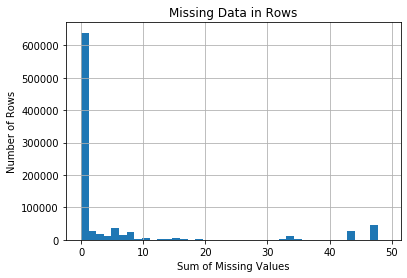

In [19]:
missing_value_rows.hist(bins= 40)
plt.xlabel('Sum of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Missing Data in Rows')
plt.show()

It can be witnessed from the bar chart that most rows contain between 0 and 10 missing values. Any row having more than 10 missing values will be dropped.

In [20]:
# Splits data into two subsets based on missing values in the rows
low_nan_rows = replaced_azdias[missing_value_rows <= 10]
high_nan_rows = replaced_azdias[missing_value_rows > 10]

In [21]:
print(low_nan_rows.shape)
print(high_nan_rows.shape)

(780153, 79)
(111068, 79)


In [22]:
# Compare the distribution of values for at six columns where there are
# no or few missing values, between the two subsets.

zero_missing_cols = missing_value_cols[missing_value_cols == 0].index.tolist()
compare_cols = zero_missing_cols[:6]

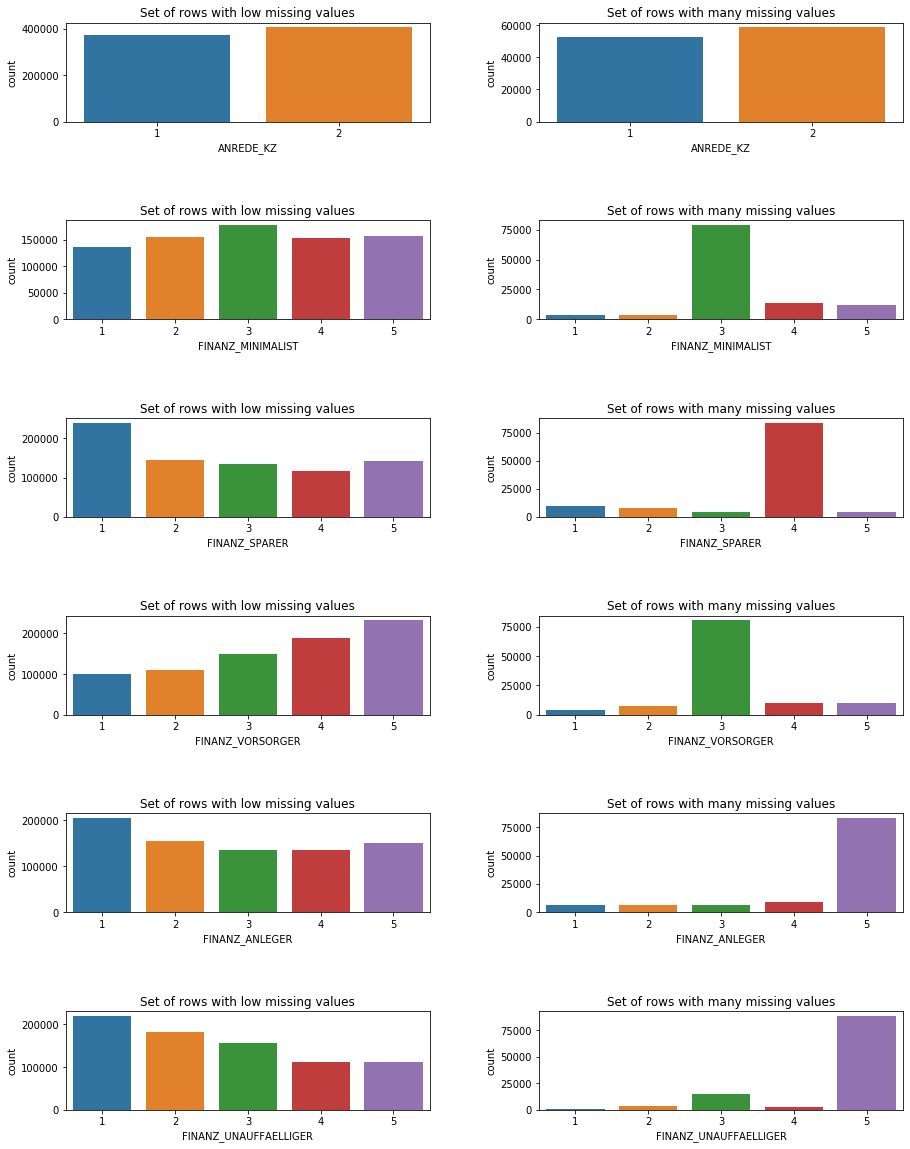

In [23]:
figure, axs = plt.subplots(nrows=len(compare_cols), ncols=2, figsize = (15,20))
figure.subplots_adjust(hspace = 1, wspace=.3)
for i in range(len(compare_cols)):
    sns.countplot(low_nan_rows[compare_cols[i]], ax=axs[i][0])
    axs[i][0].set_title('Set of rows with low missing values')
    sns.countplot(high_nan_rows[compare_cols[i]], ax=axs[i][1])
    axs[i][1].set_title('Set of rows with many missing values')

In [24]:
replaced_azdias = low_nan_rows

#### Discussion 1.1.3: Assess Missing Data in Each Row

When assessing the missing data in all the rows on the data set using the bar chart, it was deduced that most of the rows have between 0-10 missing values out of 79. The dataset was then split into two subsets based on the number of missing values in each row.

Both subsets were then compared using 5 columns that have no missing values. The assessment showed that out of the 5 columns, 4 columns had very different distributions in both sets with only 1 column having a similiar distribution.

As the subsets are qualitatively different from each other, the subset containing rows with 0-10 missing values will be used for the rest of this project.

### Step 1.2: Select and Re-Encode Features

Now that rows and columns with high percentages of missing data have been dealt with, we can shift our focus to encoding features. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, we will need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. The third column of the feature summary (`feat_info`) contains a summary of types of measurement that will assist in encoding features.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In [25]:
feat_info.head()

attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]

In [26]:
# Check counts of datatypes
feat_info['type'].value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

We have got 21 features that are categorical. For categorical data, we would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, we will do the following:
- For binary (two-level) categoricals that take numeric values, we can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, we need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), we can encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html))

In [27]:
# Get list of categorical columns
cat_cols = feat_info['attribute'][feat_info['type'] == 'categorical'].to_list()

print(cat_cols)

print(len(cat_cols))

['AGER_TYP', 'ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'KK_KUNDENTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
21


In [28]:
# Drop cat_cols that have been dropped previously

cat_cols = [col for col in cat_cols if col not in high_null_columns]

print(cat_cols)
len(cat_cols)

['ANREDE_KZ', 'CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'OST_WEST_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


18

In [29]:
# From cat_cols get cols that have only two values (binary)
binary_cols = replaced_azdias[cat_cols].nunique()[replaced_azdias[cat_cols].nunique() == 2].index.to_list()

In [30]:
print(replaced_azdias[binary_cols].dtypes)

replaced_azdias[binary_cols].head()

# The ost_west_kz needs to be changed to numerical values

ANREDE_KZ             int64
GREEN_AVANTGARDE      int64
SOHO_KZ             float64
VERS_TYP            float64
OST_WEST_KZ          object
dtype: object


ANREDE_KZ  GREEN_AVANTGARDE  SOHO_KZ  VERS_TYP OST_WEST_KZ
1          2                 0      1.0       2.0           W
2          2                 1      0.0       1.0           W
3          2                 0      0.0       1.0           W
4          1                 0      0.0       2.0           W
5          2                 0      0.0       2.0           W

In [31]:
replaced_azdias['OST_WEST_KZ'].value_counts()

W    614719
O    165434
Name: OST_WEST_KZ, dtype: int64

In [32]:
replaced_azdias['OST_WEST_KZ'].replace(['W','O'],[1,0], inplace=True)

replaced_azdias['OST_WEST_KZ'].value_counts()

1    614719
0    165434
Name: OST_WEST_KZ, dtype: int64

In [33]:
#From cat_cols get cols with more than 2 values
multi_cat_cols = replaced_azdias[cat_cols].nunique()[replaced_azdias[cat_cols].nunique() != 2].index.to_list()

In [34]:
multi_cat_cols

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [35]:
# One-hot encoding of categorical columns
encoded_azdias = pd.get_dummies(replaced_azdias, columns=multi_cat_cols)

In [36]:
encoded_azdias.shape

(780153, 194)

#### Discussion 1.2.1: Re-Encode Categorical Features

We dealt with two types of categorical features, ones with 2 values and others with more than 2 values. There was only one categorical feature that was binary were the values were non-numerical. They were replaced with 1s and 0s.

For categorical features having more than 2 values, one-hot encoding was applied to create multiple dummy variables.

#### Step 1.2.2: Engineer Mixed-Type Features

There are seven features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, we will create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. We will break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).

In [37]:
encoded_azdias.dtypes.value_counts()

uint8      128
float64     42
int64       23
object       1
dtype: int64

In [38]:
# Looks like the only object column left is a mixed-type feature
encoded_azdias.dtypes[encoded_azdias.dtypes == 'object']

CAMEO_INTL_2015    object
dtype: object

In [39]:
feat_info[feat_info['type'] == 'mixed']

attribute information_level   type missing_or_unknown
15    LP_LEBENSPHASE_FEIN            person  mixed                [0]
16    LP_LEBENSPHASE_GROB            person  mixed                [0]
22  PRAEGENDE_JUGENDJAHRE            person  mixed             [-1,0]
56               WOHNLAGE          building  mixed               [-1]
59        CAMEO_INTL_2015     microcell_rr4  mixed            [-1,XX]
64           KBA05_BAUMAX     microcell_rr3  mixed             [-1,0]
79            PLZ8_BAUMAX    macrocell_plz8  mixed             [-1,0]

In [40]:
encoded_azdias['PRAEGENDE_JUGENDJAHRE'].unique()

array([14., 15.,  8.,  3., 10., 11.,  5.,  9.,  6.,  4., nan,  2.,  1.,
       12., 13.,  7.])

In [41]:
# Dictionaries that will map values from 'PRAEGENDE_JUGENDJAHRE' into new columns

decade = {1:40, 2:40, 3:50, 4:50, 5:60, 6:60, 7:60, 8:70, 9:70, 10:80, 
         11:80, 12:80, 13:80, 14:90, 15:90} # Decade
movement = {1:0, 2:1, 3:0, 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 
         11:1, 12:0, 13:1, 14:0, 15:1} # Mainstream=0, Avantgarde=1

encoded_azdias['decade'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(decade)
encoded_azdias['movement'] = encoded_azdias['PRAEGENDE_JUGENDJAHRE'].map(movement)

encoded_azdias.drop('PRAEGENDE_JUGENDJAHRE', inplace=True, axis=1)

encoded_azdias.shape

(780153, 195)

In [42]:
encoded_azdias['CAMEO_INTL_2015'].unique()

array(['51', '24', '12', '43', '54', '22', '14', '13', '15', '33', '41',
       '34', '55', '25', nan, '23', '31', '52', '35', '45', '44', '32'],
      dtype=object)

In [43]:
# Create new columns based on the place of the digit

encoded_azdias['wealth'] = encoded_azdias['CAMEO_INTL_2015'].str[0].astype(dtype='float')

encoded_azdias['life_stage'] = encoded_azdias['CAMEO_INTL_2015'].str[1].astype(dtype='float')

encoded_azdias.drop('CAMEO_INTL_2015', inplace=True, axis=1)

In [44]:
encoded_azdias.shape

(780153, 196)

In [45]:
# One-hot encode rest of mixed columns
mixed_cols = feat_info['attribute'][feat_info['type'] == 'mixed'].to_list()

In [46]:
mixed_cols

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'KBA05_BAUMAX',
 'PLZ8_BAUMAX']

In [47]:
#Removes dropped cols and also cols dealt with previously
mixed_cols = [col for col in mixed_cols if col not in high_null_columns]

mixed_cols.remove('PRAEGENDE_JUGENDJAHRE')
mixed_cols.remove('CAMEO_INTL_2015')
                   
mixed_cols

['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE', 'PLZ8_BAUMAX']

In [48]:
#one-hot encodes rest of columns
cleaned_azdias = pd.get_dummies(encoded_azdias, columns=mixed_cols)

cleaned_azdias.shape

(780153, 257)

#### Discussion 1.2.2: Engineer Mixed-Type Features

PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 each combined more than one type of information. The columns were split into several columns to seperate the information and have each in its own column. PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 were then dropped.

The other mixed type columns were then one-hot encoded as each column had several values and it was best to assume each value is a category and create dummy variables.

#### Step 1.2.3: Complete Feature Selection

In [49]:
cleaned_azdias.dtypes.value_counts()

uint8      193
float64     41
int64       23
dtype: int64

All features have been dealt with accordingly, and converted to ints or floats

### Step 1.3: Create a Cleaning Function

As we will need to apply the same steps to the customer dataset, it will be easier to create a function that involves the cleaning, feature selection, econding and re-engineering steps performed previously. When it comes to the customer dataset we will just run this function and we will get the trimmed dataset in a single step

In [50]:
def clean_data(df):
    
    # First step fills values with NaNs
    for index, row in feat_info.iterrows():
        string_to_list = row['missing_or_unknown'].strip('][').split(',')
        str_list = list(filter(None, string_to_list)) # removes empty strings
        column_name = row['attribute']

        
        if df[column_name].dtype != object: # If the columns are not numerical
        
            int_list = list(map(int,str_list))
        
            df[column_name] = df[column_name].replace(int_list,np.NaN)
        
        else:
            df[column_name] = df[column_name].replace(str_list,np.NaN)
        
    # Second step removes the columns that previously had alot of missing values
    
    df = df.drop(high_null_columns, axis=1)
        
    # Third step - remove selected rows
    
    df = df[df.isnull().sum(axis=1) <= 10]
    
    # Fourth step - re-encode, and engineer column values
    
    df['OST_WEST_KZ'] = df['OST_WEST_KZ'].replace(['W','O'],[1,0])
    
    df = pd.get_dummies(df, columns=multi_cat_cols)
        
    df['decade'] = df['PRAEGENDE_JUGENDJAHRE'].map(decade)
    df['movement'] = df['PRAEGENDE_JUGENDJAHRE'].map(movement)
    df = df.drop('PRAEGENDE_JUGENDJAHRE', axis=1)
    
    df['wealth'] = df['CAMEO_INTL_2015'].str[0].astype(dtype='float')
    df['life_stage'] = df['CAMEO_INTL_2015'].str[0].astype(dtype='float')
    df = df.drop('CAMEO_INTL_2015', axis=1)
    
    df = pd.get_dummies(df, columns=mixed_cols)
    
    return df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale of the features. Here are the steps we need to take:

- sklearn requires that data can not have missing values in order for its estimators to work properly. So, before applying the scaler to the data, we need to make sure that we've cleaned the DataFrame of the remaining missing values. Instead of removing data points with missing data , we will use the [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values.

- After missing values have been filled out we will use the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to scale each feature to a mean of 0 and a standard deviation of 1.

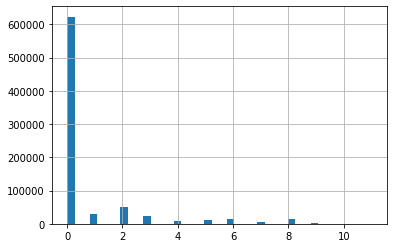

(780153, 257)

In [51]:
cleaned_azdias.isnull().sum(axis=1).hist(bins= 40)
plt.show()

cleaned_azdias.shape

We can see that more than 3/4 of the rows in our dataset do not contain any missing values. The missing data in the other rows will be filled with the most common value in that column.

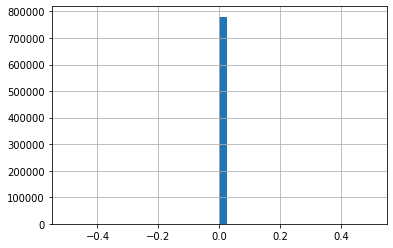

(780153, 257)

In [52]:
from sklearn.impute import SimpleImputer

imp_frq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputed_azdias = imp_frq.fit_transform(cleaned_azdias)

imputed_azdias = pd.DataFrame(imputed_azdias)

imputed_azdias.columns = cleaned_azdias.columns

imputed_azdias.isnull().sum(axis=1).hist(bins= 40)
plt.show()

imputed_azdias.shape

In [53]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()

scaled_azdias = std_scl.fit_transform(imputed_azdias)

scaled_azdias = pd.DataFrame(scaled_azdias)

scaled_azdias.columns = imputed_azdias.columns

scaled_azdias.describe()

ALTERSKATEGORIE_GROB     ANREDE_KZ  FINANZ_MINIMALIST  FINANZ_SPARER  \
count          7.801530e+05  7.801530e+05       7.801530e+05   7.801530e+05   
mean          -9.249701e-15 -1.916317e-15       2.402294e-14   4.249086e-17   
std            1.000001e+00  1.000001e+00       1.000001e+00   1.000001e+00   
min           -1.767651e+00 -1.043411e+00      -1.488140e+00  -1.151087e+00   
25%           -7.847811e-01 -1.043411e+00      -7.624505e-01  -1.151087e+00   
50%            1.980888e-01  9.583948e-01      -3.676105e-02   1.939963e-01   
75%            1.180959e+00  9.583948e-01       6.889284e-01   8.665379e-01   
max            1.180959e+00  9.583948e-01       1.414618e+00   1.539080e+00   

       FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
count      7.801530e+05    7.801530e+05           7.801530e+05   
mean       2.985086e-14   -1.446077e-14           1.557670e-15   
std        1.000001e+00    1.000001e+00           1.000001e+00   
min       -1.771610e+00   -1.247812e+00          -1.172510e+00   
25%       -1.045251e+00   -1.247812e+00          -1.172510e+00   
50%        4.074683e-01    1.097306e-01          -4.549831e-01   
75%        1.133828e+00    7.885020e-01           9.800714e-01   
max        1.133828e+00    1.467273e+00           1.697599e+00   

       FINANZ_HAUSBAUER  GREEN_AVANTGARDE    HEALTH_TYP  ...  WOHNLAGE_3.0  \
count      7.801530e+05      7.801530e+05  7.801530e+05  ...  7.801530e+05   
mean      -1.402620e-14     -1.326667e-14 -4.077524e-15  ... -2.749779e-15   
std        1.000001e+00      1.000001e+00  1.000001e+00  ...  1.000001e+00   
min       -1.532818e+00     -5.311987e-01 -1.638593e+00  ... -6.789449e-01   
25%       -8.178947e-01     -5.311987e-01 -3.161576e-01  ... -6.789449e-01   
50%       -1.029710e-01     -5.311987e-01 -3.161576e-01  ... -6.789449e-01   
75%        6.119528e-01     -5.311987e-01  1.006277e+00  ...  1.472874e+00   
max        1.326876e+00      1.882535e+00  1.006277e+00  ...  1.472874e+00   

       WOHNLAGE_4.0  WOHNLAGE_5.0  WOHNLAGE_7.0  WOHNLAGE_8.0  \
count  7.801530e+05  7.801530e+05  7.801530e+05  7.801530e+05   
mean   4.749834e-15 -6.953477e-15  1.382275e-15 -7.970955e-15   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.554364e-01 -3.210503e-01 -5.221422e-01 -1.400996e-01   
25%   -4.554364e-01 -3.210503e-01 -5.221422e-01 -1.400996e-01   
50%   -4.554364e-01 -3.210503e-01 -5.221422e-01 -1.400996e-01   
75%   -4.554364e-01 -3.210503e-01 -5.221422e-01 -1.400996e-01   
max    2.195696e+00  3.114777e+00  1.915187e+00  7.137777e+00   

       PLZ8_BAUMAX_1.0  PLZ8_BAUMAX_2.0  PLZ8_BAUMAX_3.0  PLZ8_BAUMAX_4.0  \
count     7.801530e+05     7.801530e+05     7.801530e+05     7.801530e+05   
mean      3.938428e-14     1.671425e-14     2.264522e-14    -2.197941e-14   
std       1.000001e+00     1.000001e+00     1.000001e+00     1.000001e+00   
min      -1.326374e+00    -3.145844e-01    -2.635029e-01    -2.796395e-01   
25%      -1.326374e+00    -3.145844e-01    -2.635029e-01    -2.796395e-01   
50%       7.539349e-01    -3.145844e-01    -2.635029e-01    -2.796395e-01   
75%       7.539349e-01    -3.145844e-01    -2.635029e-01    -2.796395e-01   
max       7.539349e-01     3.178797e+00     3.795025e+00     3.576032e+00   

       PLZ8_BAUMAX_5.0  
count     7.801530e+05  
mean     -4.120302e-14  
std       1.000001e+00  
min      -3.771155e-01  
25%      -3.771155e-01  
50%      -3.771155e-01  
75%      -3.771155e-01  
max       2.651708e+00  

[8 rows x 257 columns]

### Discussion 2.1: Apply Feature Scaling

The simple imputer was used to fill out the missing rows with the most frequent values instead of dropping them. Standard scaler was then successfuly applied on the dataset to scale all the features.

### Step 2.2: Perform Dimensionality Reduction

Now that we have scaled the data, we are ready to apply dimensionality reduction techniques.

In [54]:
from sklearn.decomposition import PCA

# Apply PCA to the data.
pca = PCA()
X_pca = pca.fit_transform(scaled_azdias)

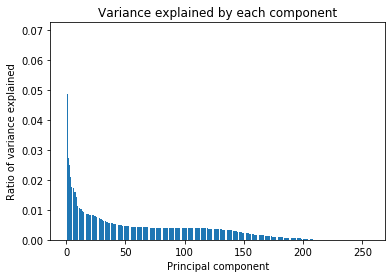

In [55]:
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

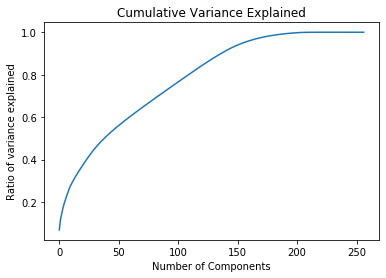

In [56]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

In [57]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(125)
X_pca = pca.fit_transform(scaled_azdias)

sum(pca.explained_variance_ratio_)

0.8543777108434145

### Discussion 2.2: Perform Dimensionality Reduction

After performing a variability analysis demonstrated by the graph, it showed that the sum of the variability explained by all 125 components after PCA was applied was about 85%. This shows that we can cut the number of features to be used in our cluster analysis by more than half without losing significant amount of information about our data.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a good idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

Each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

In [58]:
# Function that maps weight of a principal component to corresponding feature names
# It then prints the linked values, sorted by weight
def print_component(pca, comp):
    if comp <= len(pca.components_):
        weight_df = pd.DataFrame({'weight': pca.components_[comp]}, index=scaled_azdias.columns)
        print("Most weighted features for component", comp)
        print(weight_df.sort_values(by=['weight']).head(5))
        print(weight_df.sort_values(by=['weight']).tail(5))
    else:
        print('That is not the right input, please read the docstring before continuing.')

In [59]:
#Plot the first component
print_component(pca, 0)

Most weighted features for component 0
                     weight
MOBI_REGIO        -0.179072
FINANZ_MINIMALIST -0.176344
PLZ8_ANTG1        -0.172699
KBA05_ANTG1       -0.170625
KBA05_GBZ         -0.168877
                      weight
PLZ8_ANTG4          0.165518
wealth              0.170330
HH_EINKOMMEN_SCORE  0.171994
PLZ8_ANTG3          0.172481
LP_STATUS_GROB_1.0  0.184439


In [60]:
#Plot the second component
print_component(pca,1)

Most weighted features for component 1
                         weight
decade                -0.223226
FINANZ_SPARER         -0.220241
FINANZ_UNAUFFAELLIGER -0.206890
SEMIO_REL             -0.198480
FINANZ_ANLEGER        -0.197949
                        weight
SEMIO_LUST            0.151618
SEMIO_ERL             0.162800
ZABEOTYP_3            0.187644
FINANZ_VORSORGER      0.212014
ALTERSKATEGORIE_GROB  0.219507


In [61]:
#Plot the third component
print_component(pca,2)

Most weighted features for component 2
              weight
ANREDE_KZ  -0.310737
SEMIO_KAEM -0.276516
SEMIO_KRIT -0.246845
SEMIO_DOM  -0.242049
SEMIO_ERL  -0.199078
               weight
FINANZTYP_5  0.133829
SEMIO_KULT   0.233122
SEMIO_SOZ    0.239812
SEMIO_FAM    0.240073
SEMIO_VERT   0.290252


### Discussion 2.3: Interpret Principal Components

It can be seen from the first principal component that:

- MOBI REGIO and wealth have a negative correlation - As the wealth of the individual decreases they tend to have higher movements

- wealth and FINANZ_MINIMALIST have a positive correlation - As the wealth of an individual decreases they tend to have a higher minimalist lifestyle

It can be seen from the second principal component that:

- decade, FINANZ_SPARER and FINANZ_ANLEGER have a positive correlation - As the decade of an individual increases, indicating that they are younger, they tend to save less(FINANZ_SPARER) and also invest less(FINANZ_ANLEGER)

- decade and ALTERSKATEGORIE_GROB have a negative correlation - If the decade of an individual is high, indicating they were born late, they would be young in age and vice versa



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

We've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. First, we will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

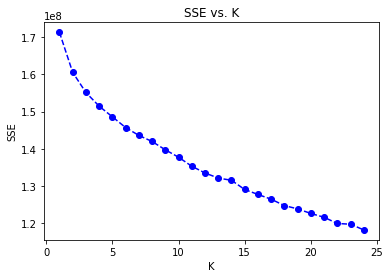

In [62]:
from sklearn.cluster import KMeans

def get_kmeans_score(data, center):

    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to the data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,25))

for center in centers:
    scores.append(get_kmeans_score(X_pca, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [63]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans = KMeans(n_clusters=13)

model = kmeans.fit(X_pca)

In [64]:
population_predictions = model.predict(X_pca)    

### Discussion 3.1: Apply Clustering to General Population

The graph plotted above shows that from 1 to 13 clusters the SSE dropped from 1.7 to about 1.3. Then from 13 to 25 it dropped from 1.3 to about 1.2. The rate of decrease of SSE from 13 to 25 is much lower, almost a fourth, of that from 1 to 13. As the rate of decrease in SSE starts to reduce and stabilise around 13 clusters, 13 clusters will be chosen to carry out the rest of the analysis.

### Step 3.2: Apply All Steps to the Customer Data

Now that we have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters.

In [65]:
customers = pd.read_csv('Udacity_Customers_Subset.csv', delimiter= ';')

In [66]:
customers.shape

(191652, 85)

In [67]:
#Apply the cleaning function created earlier
customers_cleaned = clean_data(customers)

In [68]:
customers_cleaned.shape

(139068, 256)

After the customer dataset has been cleaned and transformed, it has 256 columns which is not equal to the 257 columns of azdias. Let's see why.

In [69]:
columns_azdias = imputed_azdias.columns.tolist()
columns_customers = customers_cleaned.columns.tolist()

missing_cols = [col for col in columns_azdias if col not in columns_customers]

print(missing_cols)

['GEBAEUDETYP_5.0']


The problem is that no rows in the customer dataset for the column GEBAEUDETYP have the value 5. So when pd.dummies (one-hot encoding) is applied on this column, azdias will have on more column compared to customers for the value of 5. The solution would be to create this column and fill it with zeros.

In [70]:
customers_cleaned['GEBAEUDETYP_5.0'] = 0

customers_cleaned.shape

(139068, 257)

The number of columns are now the same on both sets of data. It is important to re-order the columns in customers to that of azdias for the clustering to be applied properly.

In [71]:
customers_cleaned = customers_cleaned[imputed_azdias.columns]

(139068, 257)

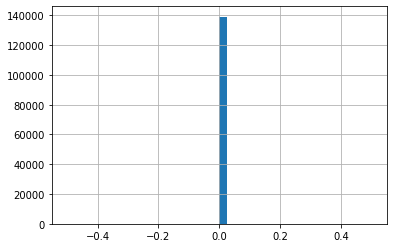

In [72]:
# Fill missing rows using the imputer from azdias

imputed_customers = imp_frq.transform(customers_cleaned)

imputed_customers = pd.DataFrame(imputed_customers)

imputed_customers.columns = customers_cleaned.columns

imputed_customers.isnull().sum(axis=1).hist(bins=40)

imputed_customers.shape

In [73]:
# Scaled customer dataframe using standard scaling

scaled_customers = std_scl.transform(imputed_customers)

scaled_customers = pd.DataFrame(scaled_customers)

scaled_customers.columns = imputed_customers.columns

In [74]:
# PCA applied using the pca object fit to azdias

customers_pca = pca.transform(scaled_customers)

In [75]:
# Get predictions from the clustering object fit to azdias

customer_predictions = model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, we have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final step, we will compare the two cluster distributions to see where the strongest customer base for the company is.

In [81]:
# Get proportion of people belonging to each cluster in customers

cust_prds_df = pd.Series(customer_predictions)

cust_props = cust_prds_df.value_counts()/cust_prds_df.value_counts().sum()

cust_props = cust_props.sort_index()

cust_props

0     0.052118
1     0.010463
2     0.082456
3     0.213550
4     0.007673
5     0.008708
6     0.081672
7     0.022040
8     0.060625
9     0.338151
10    0.047617
11    0.014123
12    0.060805
dtype: float64

Text(0.5, 1.0, 'Proportion of each cluster in the customer data set')

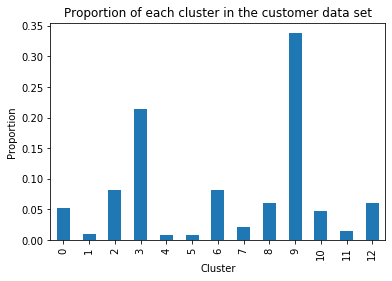

In [96]:
cust_props.plot.bar()

plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Proportion of each cluster in the customer data set')

In [78]:
# Get proportion of people belonging to each cluster in general population

pop_prds_df = pd.Series(population_predictions)

pop_props = pop_prds_df.value_counts()/pop_prds_df.value_counts().sum()

pop_props = pop_props.sort_index()

pop_props

0     0.064906
1     0.034118
2     0.100876
3     0.084865
4     0.026591
5     0.059890
6     0.139849
7     0.039145
8     0.075540
9     0.102308
10    0.034646
11    0.188753
12    0.048512
dtype: float64

Text(0.5, 1.0, 'Proportion of each cluster in the general population data set')

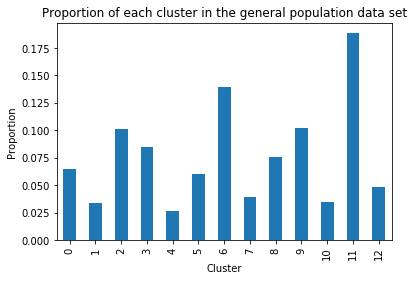

In [97]:
pop_props.plot.bar()

plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Proportion of each cluster in the general population data set')

Text(0.5, 1.0, 'Difference in proportion from both sets')

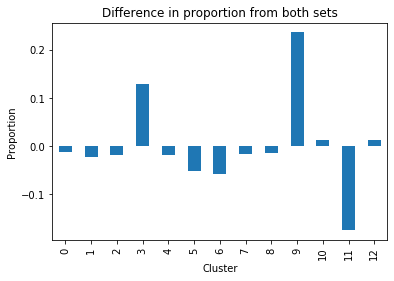

In [98]:
# Subtract proportions from each other to see which clusters are over and under represented in the cus

diff_props = cust_props - pop_props

diff_props.plot.bar()

plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title('Difference in proportion from both sets')

In [86]:
# Check what kind of people are part of the overrepresented cluster
cluster_9 = std_scl.inverse_transform(pca.inverse_transform(model.cluster_centers_[9]))

In [90]:
over_represented = pd.Series(data = cluster_9, index = customers_cleaned.columns)

over_represented

ALTERSKATEGORIE_GROB    3.389656
ANREDE_KZ               1.484660
FINANZ_MINIMALIST       4.614510
FINANZ_SPARER           1.549581
FINANZ_VORSORGER        4.345108
                          ...   
PLZ8_BAUMAX_1.0         0.880230
PLZ8_BAUMAX_2.0         0.068239
PLZ8_BAUMAX_3.0         0.010816
PLZ8_BAUMAX_4.0         0.011115
PLZ8_BAUMAX_5.0         0.021143
Length: 257, dtype: float64

In [93]:
over_represented['wealth']

2.1025717542424474

In [91]:
#Check what kind of people are part of the underrepresented cluster
cluster_11 = std_scl.inverse_transform(pca.inverse_transform(model.cluster_centers_[11]))

In [92]:
under_represented = pd.Series(data = cluster_11, index = customers_cleaned.columns)

under_represented

ALTERSKATEGORIE_GROB    1.912029
ANREDE_KZ               1.554770
FINANZ_MINIMALIST       1.576880
FINANZ_SPARER           4.384006
FINANZ_VORSORGER        2.059196
                          ...   
PLZ8_BAUMAX_1.0         0.453024
PLZ8_BAUMAX_2.0         0.109642
PLZ8_BAUMAX_3.0         0.091891
PLZ8_BAUMAX_4.0         0.107451
PLZ8_BAUMAX_5.0         0.227147
Length: 257, dtype: float64

In [94]:
under_represented['wealth']

3.9045264659711796

### Discussion 3.3: Compare Customer Data to Demographics Data

The analysis above showed that cluster 9 is over represented in the customer data compared to the general population data. Cluster 9 involves people who usually are:

- Between 46-60 years old - (ALTERSKATEGORIE_GROB = 3.3)
- Come from prosperous households - (wealth = 2)
- Are not very minimal in thier lifestyle - (FINANZ_MINIMALIST = 4.6)
- Are high money savers - (FINANZ_SPARER = 1.5)

Cluster 11 showed people who are under represented in the customer data. They usually are:

- Between 30-45 years old - (ALTERSKATEGORIE_GROB = 1.9)
- Come from less affluent households - (wealth = 3.9)
- Are very minimal in thier lifestyle - (FINANZ_MINIMALIST = 1.57)
- Are low money savers - (FINANZ_SPARER = 4.4)